<a href="https://colab.research.google.com/github/DevZyan/machine_learning_projects/blob/ml/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES AND SETTING UP DATAFRAME**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

the initial size of diabetes dataset is 768 rows and 9 columns

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


None of the Entries are left blank.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above statistics, Min of Glucose, Blood Pressure, Skin Thickness, Insulin and BMI cannot be 0. So therefore, 2 ways - Either just drop every row that contains a zero. OR replace them with the mean/mode/median of that particular column.
I plan to do both of them and then run a basic Logistic Regression model to check which has the higher accuracy.
BUT having a large dataset for the model to train in, is the better option since more the data better the model.

In [ ]:
df1 = pd.read_csv('diabetes.csv')

In [ ]:
df1 = df1[df1['Glucose'] != 0]

In [ ]:
df1 = df1[df1['BloodPressure'] != 0]

In [ ]:
df1.shape

(728, 9)

In [ ]:
df1 = df1[df1['SkinThickness'] != 0]

In [ ]:
df1 = df1[df1['Insulin'] != 0]

In [ ]:
df1 = df1[df1['BMI'] != 0]

In [ ]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df1.shape

(392, 9)

In [ ]:
#df.describe()

In [ ]:
#df.shape

In [ ]:
import seaborn as sns

In [ ]:
#sns.displot(df)

<Axes: ylabel='Pregnancies'>

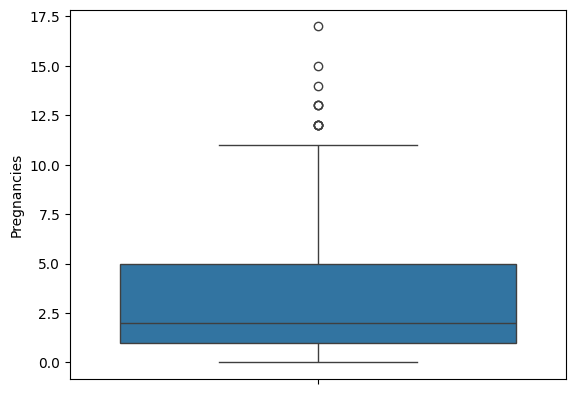

In [ ]:
sns.boxplot(df1['Pregnancies'])

<Axes: ylabel='BloodPressure'>

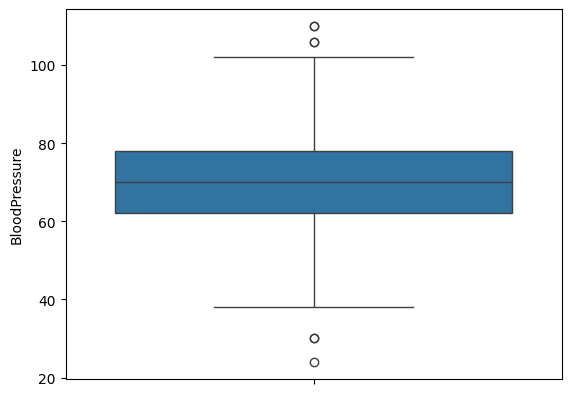

In [ ]:
sns.boxplot(df1['BloodPressure'])

<Axes: ylabel='Glucose'>

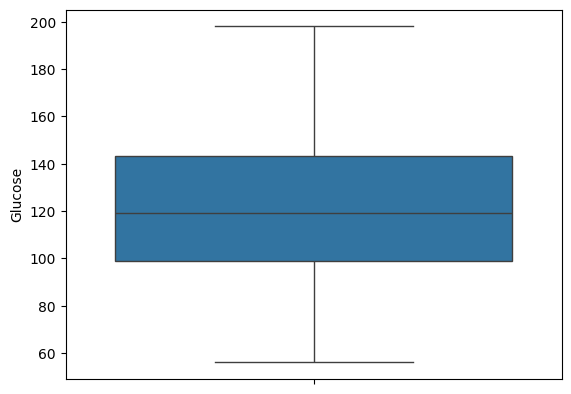

In [ ]:
sns.boxplot(df1['Glucose'])

<Axes: ylabel='SkinThickness'>

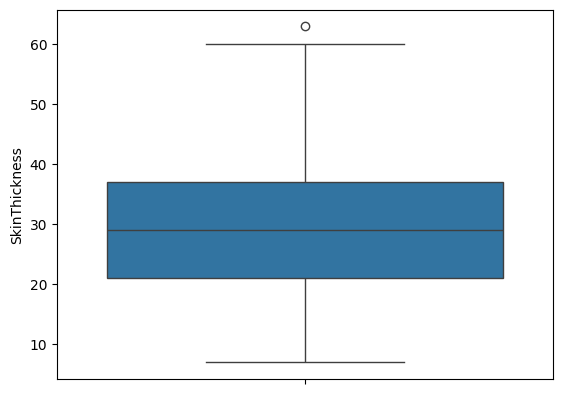

In [ ]:
sns.boxplot(df1['SkinThickness'])

<Axes: ylabel='Insulin'>

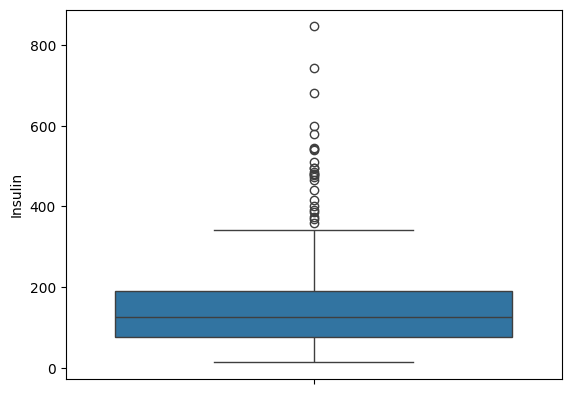

In [ ]:
sns.boxplot(df1['Insulin'])

<Axes: ylabel='BMI'>

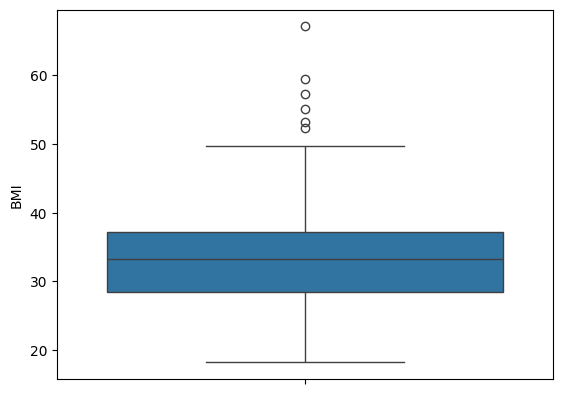

In [ ]:
sns.boxplot(df1['BMI'])

## Removing Outliers from df1 then taking the mean of values and replacing zeroes in df with df1 means

# **Z-score method to remove outliers**

In [ ]:
ul = df1['Pregnancies'].mean() + 3*df1['Pregnancies'].std() # upper limit
ll = df1['Pregnancies'].mean() - 3*df1['Pregnancies'].std() # lower limit
print("upper limit :", ul)
print("lower limit :", ll)

upper limit : 12.935293776794161
lower limit : -6.3332529604676315


In [ ]:
df1.loc[(df1['Pregnancies'] > ul) | (df1['Pregnancies'] < ll)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
28,13,145,82,19,110,22.2,0.245,57,0
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
323,13,152,90,33,29,26.8,0.731,43,1
744,13,153,88,37,140,40.6,1.174,39,0


now i can either do capping or trimming, i would like to go with trimming since removing the outlier looks like the best option.

In [36]:
df2 = df1.loc[(df1['Pregnancies'] < ul) | (df1['Pregnancies'] > ll)]

REPEATING THE PROCESS FOR BMI, INSULIN and SKIN THICKNESS

In [50]:
ul = df1['BMI'].mean() + 3*df1['BMI'].std() # upper limit
ll = df1['BMI'].mean() - 3*df1['BMI'].std() # lower limit
print("upper limit :", ul)
print("lower limit :", ll)

upper limit : 54.16920210300049
lower limit : 12.003246876591344


In [49]:
df2.loc[(df2['BMI'] > ul) | (df2['BMI'] < ll)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [48]:
df2 = df2[df2['BMI'].between(ll, ul)]

In [55]:
ul = df2['Insulin'].mean() + 3*df2['Insulin'].std() # upper limit
ll = df2['Insulin'].mean() - 3*df2['Insulin'].std() # lower limit
print("upper limit :", ul)
print("lower limit :", ll)

upper limit : 436.0717236529405
lower limit : -143.3664604950457


In [58]:
df2.loc[(df2['Insulin'] > ul) | (df2['Insulin'] < ll)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1
...,...,...,...,...,...,...,...,...,...
751,1,121,78,39,74,39.0,0.261,28,0
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
763,10,101,76,48,180,32.9,0.171,63,0


In [53]:
df2 = df2[df2['Insulin'].between(ll, ul)]

In [56]:
ul = df2['SkinThickness'].mean() + 3*df2['SkinThickness'].std() # upper limit
ll = df2['SkinThickness'].mean() - 3*df2['SkinThickness'].std() # lower limit
print("upper limit :", ul)
print("lower limit :", ll)

upper limit : 59.8515765339898
lower limit : -2.1936817971476934


In [59]:
df2.loc[(df2['SkinThickness'] > ul) | (df2['SkinThickness'] < ll)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100,88,60,110,46.8,0.962,31,0


In [60]:
df2 = df2[df2['SkinThickness'].between(ll, ul)]

<Axes: >

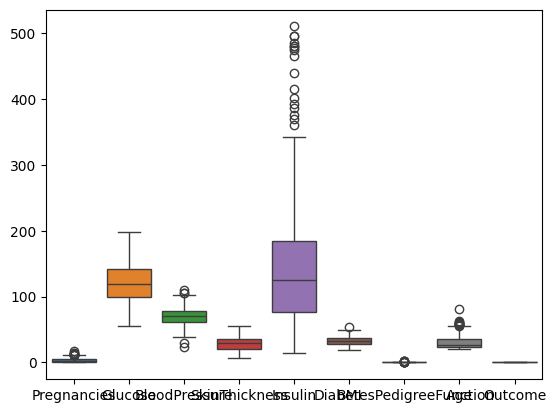

In [61]:
sns.boxplot(df2)

In [68]:
BMI = df2['BMI'].mean()
ST = df2['SkinThickness'].mean()
BP = df2['BloodPressure'].mean()
Insulin = df2['Insulin'].mean()
Glucose = df2['Glucose'].mean()

In [69]:
df = df.replace({'BMI': 0}, BMI)
df = df.replace({'SkinThickness': 0}, ST)
df = df.replace({'BloodPressure': 0}, BP)
df = df.replace({'Insulin': 0}, Insulin)
df = df.replace({'Glucose': 0}, Glucose)

In [70]:
df.shape

(768, 9)

In [71]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686363,72.318900,29.033205,151.116871,32.460665,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.102798,8.792903,85.142837,6.875203,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.746702,146.448549,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,146.448549,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


THE NEXT PART IS WHERE I RUN THE LOGISTIC REGRESSION,

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [79]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [77]:
y_pred = model.predict(X_test_scaled)

In [78]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[82 17]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Accuracy Score: 0.7532467532467533


NOW CHECKING ACCURACY SCORE WITHOUT REMOVING OUTLIERS

In [81]:
X = df1.drop('Outcome', axis=1)
y = df1['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[45  7]
 [11 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        52
           1       0.70      0.59      0.64        27

    accuracy                           0.77        79
   macro avg       0.75      0.73      0.74        79
weighted avg       0.77      0.77      0.77        79

Accuracy Score: 0.7721518987341772


NOW ON RAW DATA

In [82]:
df3 = pd.read_csv('diabetes.csv')

In [84]:
X = df3.drop('Outcome', axis=1)
y = df3['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[79 20]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Accuracy Score: 0.7532467532467533
